In this case study we are doing Exploratory Data Analysis on "Loan Application"

Problem Statement:


To identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate

Two types of risks are associated with the bank’s decision:

1.If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
2.If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 300) # to display maximum columns
pd.set_option('display.max_rows', 300) # to display maximum rows

In [2]:
#Import the warnings.

import warnings
warnings.filterwarnings('ignore')

**Reading the Data set**

In [3]:
inp0=pd.read_csv("application_data.csv")

In [4]:
#Display the first 5 records
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#checking shape of the dataframe
inp0.shape

(307511, 122)

In [6]:
#checking info of the dataframe
inp0.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
#checking the datatypes of each field in dataframe
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [8]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Data quality check and missing values

#### Treating null values

In [9]:
#checking for percentage of missing values in each column

inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
#checking for coloums having greater than 50% null value

emptycol=inp0.isnull().sum()/len(inp0)*100
emptycol=emptycol[emptycol.values>50.0]
print(emptycol)
len(emptycol)

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

41

In [11]:
#Removing all columns having more than 50% null values
inp0 = inp0.loc[:,inp0.isnull().mean()<=0.5]

In [12]:
#checking shape of the dataframe after removing columns
inp0.shape

(307511, 81)

In [13]:
# Checking the columns having less null percentage
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

**Inferences** : We can see that we have some null value in the columns.All these values are less than 50%

>For columns which has less percentage(around 13% or so) of null values, checking what will be the best metric to impute missing values.If the column we are checking is a categorical column,then which category can we use to fill the null values.For others we check if mean or median can be imputed or not.Others cases may be imputing with 0.

In [14]:
#Selecting columns with less or equal to than 13% null vallues
list(inp0.columns[(inp0.isnull().mean()<=0.13) & (inp0.isnull().mean()>0)])

#We will check these columns for possible imputation

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

**Taking one Field at a time**

**1. Analysis of AMT_ANNUITY column**

In [15]:
print(inp0.AMT_ANNUITY.head()) # correct datatype
print(inp0.AMT_ANNUITY.describe())


0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


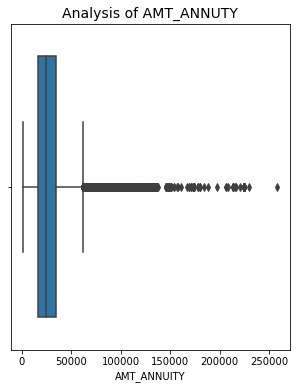

In [16]:
#plotting the values of AMT_ANNUITY column using box plot to detect outliers since it is a continuous variable
plt.figure(figsize=(5,6))
sns.boxplot(inp0['AMT_ANNUITY'])
plt.title("Analysis of AMT_ANNUTY",fontsize=14)
plt.show()

> From box plot it seems, it has lot of outliers so considering median measure we can impute 24903(median) value in place of missing values

In [17]:
inp0.AMT_ANNUITY.median()

24903.0

In [18]:
#Verifying the count of missing value for AMT_ANNUITY column
inp0.AMT_ANNUITY.isnull().sum()

12

In [19]:
# Filling missing values in column AMT_ANNUITY with median
fillMissingVal=inp0['AMT_ANNUITY'].median()
inp0['AMT_ANNUITY'].fillna(value = fillMissingVal, inplace =True)

In [20]:
#checking the count of missing value for AMT_ANNUITY column
inp0.AMT_ANNUITY.isnull().sum()

0

**2. Analysis of CNT_FAM_MEMBERS**

In [21]:
#checking count of family members
inp0['CNT_FAM_MEMBERS'].value_counts(dropna=False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
NaN          2
15.0         1
13.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

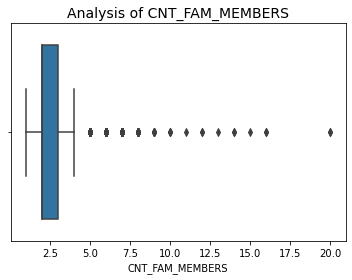

In [22]:
#plotting the values of CNT_FAM_MEMBERS column using box plot to detect outliers
sns.boxplot(inp0['CNT_FAM_MEMBERS'])
plt.title("Analysis of CNT_FAM_MEMBERS",fontsize=14)
plt.show()

>From box plot it seems, it has lot of outliers so considering median measure to impute the missing values

In [23]:
print(inp0['CNT_FAM_MEMBERS'].median())

2.0


In [24]:
# Filling missing values with median i.e 2.0
fillMissingVal=inp0['CNT_FAM_MEMBERS'].median()
inp0['CNT_FAM_MEMBERS'].fillna(value = fillMissingVal, inplace =True)

In [25]:
#checking the count of missing value for CNT_FAM_MEMBERS column
inp0.CNT_FAM_MEMBERS.isnull().sum()

0

**3. Analysis of AMT_GOODS_PRICE**

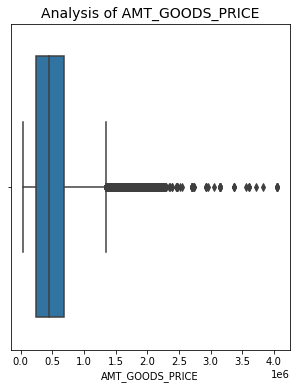

In [26]:
#box plotting the values of AMT_GOODS_PRICE
plt.figure(figsize=(5,6))
sns.boxplot(inp0['AMT_GOODS_PRICE'])
plt.title("Analysis of AMT_GOODS_PRICE",fontsize=14)
plt.show()

>From box plot it seems, it has lot of outliers so considering median measure to the missing values

In [27]:
#describe the info of column AMT_GOODS_PRICE
print(inp0['AMT_GOODS_PRICE'].describe())
print(inp0['AMT_GOODS_PRICE'].median())
print(inp0['AMT_GOODS_PRICE'].mean())
print(inp0['AMT_GOODS_PRICE'].max())
print(inp0['AMT_GOODS_PRICE'].min())

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
450000.0
538396.2074288895
4050000.0
40500.0


Inference: As we are not getting any clear understanding of the data, so we would keep the null values.



**4. NAME_TYPE_SUITE imputation**

In [28]:
inp0['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

>Since it is a categorical value, considering mode measure to impute missing values, considering the value to be imputed is - Unaccompanied

In [29]:
imputVAL =inp0.NAME_TYPE_SUITE.mode()
imputVAL

0    Unaccompanied
dtype: object

**5.EXT_SOURCE_2 imputation**

In [30]:
inp0['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.157007      1
0.721955      1
0.032513      1
0.204329      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

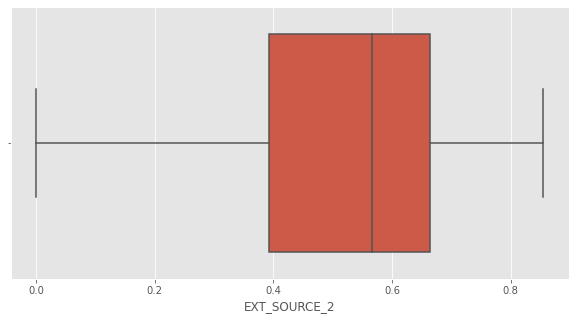

In [31]:
# EXT_SOURCE_2 is a continuous variable. So checking for outliers
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(inp0['EXT_SOURCE_2'])
plt.show()

>Since EXT_SOURCE_2 has no outlier,but there is some tilt towards the outlier. 

In [32]:
inp0.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

>Since mean and median are very close to each other we can use any one to impute the missing values.Choosing the meadian to impute the value

In [33]:
imputVal=inp0.EXT_SOURCE_2.median()

### Changing the datatype for the required columns

In [34]:
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [35]:
# finding count of unique values in each column
print(inp0.nunique().sort_values())

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

In [36]:
# converting negative DAYS_BIRTH value to positive value
inp0['DAYS_BIRTH']=inp0['DAYS_BIRTH'].abs()
# converting negative DAYS_EMPLOYED value to positive value
inp0['DAYS_EMPLOYED']=inp0['DAYS_EMPLOYED'].abs()
# converting negative DAYS_REGISTRATION value to positive value
inp0['DAYS_REGISTRATION']=inp0['DAYS_REGISTRATION'].abs()
# converting negative DAYS_ID_PUBLISH value to positive value
inp0['DAYS_ID_PUBLISH']=inp0['DAYS_ID_PUBLISH'].abs()
# converting negative DAYS_LAST_PHONE_CHANGE value to positive value
inp0['DAYS_LAST_PHONE_CHANGE']=inp0['DAYS_LAST_PHONE_CHANGE'].abs()
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Checking the float type columns
inp0.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [38]:
#Converting these count columns to int64
ColumnToConvert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
inp0.loc[:,ColumnToConvert]=inp0.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

In [39]:
#Checking the object type columns
ColumnToConvert = list(inp0.select_dtypes(include='object').columns)

In [40]:
inp0.loc[:,ColumnToConvert]=inp0.loc[:,ColumnToConvert].apply(lambda col: col.astype('str',errors='ignore'))

In [41]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Making Gender more readable
inp0['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [43]:
# Dropping the Gender = XNA from the data set as there is not enough data regarding that 
inp0 =inp0[inp0['CODE_GENDER']!='XNA']
inp0['CODE_GENDER'].replace(['M','F'],['Male','Female'],inplace=True)

In [44]:
inp0['CODE_GENDER'].value_counts()

Female    202448
Male      105059
Name: CODE_GENDER, dtype: int64

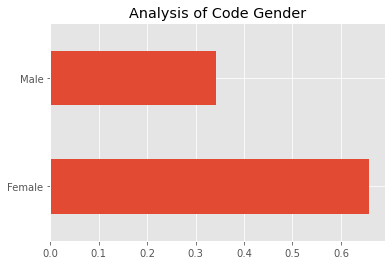

In [45]:
#plot the bar graph of CODE_GENDER
inp0['CODE_GENDER'].value_counts(normalize=True).plot.barh(title='Analysis of Code Gender')
plt.show()

**Analysis of ORGANIZATION_TYPE**

In [46]:
#checking count of each Type of organization where client works
inp0['ORGANIZATION_TYPE'].value_counts(dropna=False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [47]:
#describe the info of column ORGANIZATION_TYPE
print(inp0['ORGANIZATION_TYPE'].mode())
print(inp0['ORGANIZATION_TYPE'].describe())

0    Business Entity Type 3
dtype: object
count                     307507
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


**Inference:**
There are 55374 rows wit XNA value which is 18% of the total count. So we can discard them.

###  Binning variables for analysis

In [48]:
#Creating A new categorical variable based on income total
q1=inp0['AMT_INCOME_TOTAL'].quantile(0.25)
q2=inp0['AMT_INCOME_TOTAL'].quantile(0.50)
q3=inp0['AMT_INCOME_TOTAL'].quantile(0.75)
m=inp0['AMT_INCOME_TOTAL'].max()

In [49]:
# Binning AMT_INCOME_TOTAL into AMT_INCOME_TOTAL_bin so we don't loose data and have binned values
inp0['AMT_INCOME_TOTAL_bin'] = pd.cut(inp0['AMT_INCOME_TOTAL'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])
print(inp0.AMT_INCOME_TOTAL_bin.value_counts())

medium    82212
High      71536
Low       53181
Name: AMT_INCOME_TOTAL_bin, dtype: int64


In [50]:
# Creating bins for Credit amount
q1=inp0['AMT_CREDIT'].quantile(0.25)
q2=inp0['AMT_CREDIT'].quantile(0.50)
q3=inp0['AMT_CREDIT'].quantile(0.75)
m=inp0['AMT_CREDIT'].max()

In [51]:
# Binning AMT_CREDIT into AMT_CREDIT_bin so we don't loose data and have binned values
inp0['AMT_CREDIT_bin'] = pd.cut(inp0['AMT_CREDIT'],[q1, q2, q3,m ], labels = ['Low', 'medium', 'High'])
print(inp0.AMT_CREDIT_bin.value_counts())

medium    77785
High      75876
Low       75426
Name: AMT_CREDIT_bin, dtype: int64


###  Checking for imbalance in Target

In [52]:
inp0['TARGET'].value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

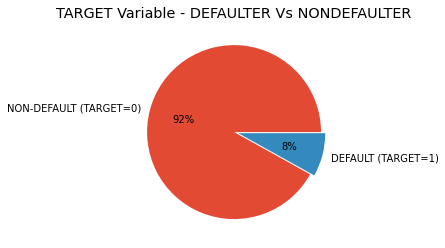

In [53]:
plt.pie(inp0['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
plt.show()

> Its clear that there is an imbalance between people who defaulted and who didn't default. More than 92% of people didn't default as opposed to 8% who defaulted.

###  Splitting the dataframe into two separate dfs 

In [54]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0 = inp0.loc[inp0["TARGET"]==0]
target1 = inp0.loc[inp0["TARGET"]==1]

In [55]:
# Calculating Imbalance percentage
imbalance=round(len(target0)/len(target1),2)
imbalance

11.39

###  Univariate Analysis for categorical variable

#### WEEKDAY_APPR_PROCESS_START
##### For TARGET=0

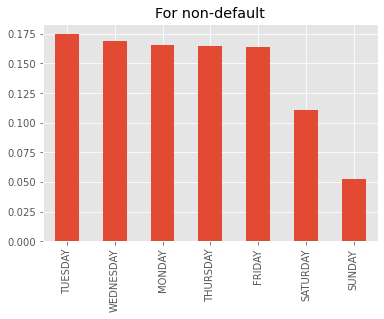

In [57]:
target0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('For non-default')
plt.show()

> From the graph we can conclude that application starting processes will be less in saturday and sunday

#### For TARGET=1

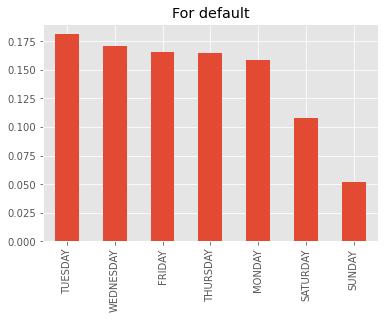

In [58]:
target1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('For default')
plt.show()

> From the graph we can conclude that application starting processes are generally less in saturday and sunday.

### NAME_EDUCATION_TYPE (categorical ordered variable)
#### for Target=0

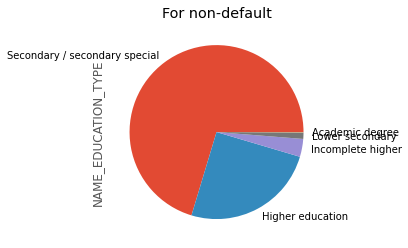

In [59]:

target0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title('For non-default')
plt.show()

### For Target=1

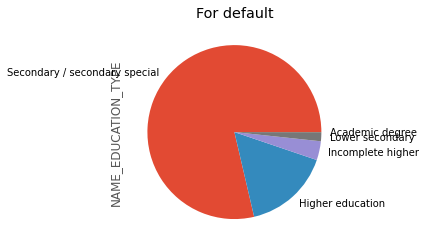

In [60]:

target1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title('For default')
plt.show()

>From the plots above, we can conclude that secondary/special educated people are applying loans high in number and Academic degree educated people are applying loan in least count.

### NAME_FAMILY_STATUS 
#### for TARGET=0

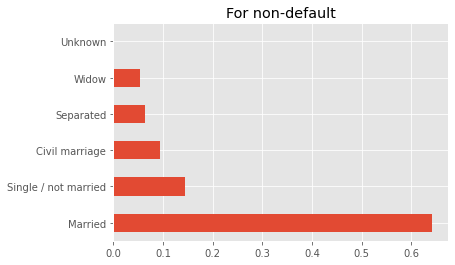

In [61]:
target0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('For non-default')
plt.show()

#### For target 1

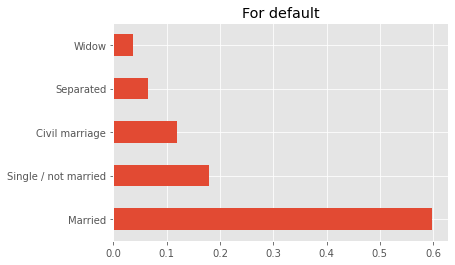

In [62]:
target1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('For default')
plt.show()

> The order of both default and non default customers is same i.e., Married,Single/not married,civil marriage,seperated,widow
 It also shows that there exists few(1 or 2) unknown values in non default client family status.
We can say more married people tend to take more Loan as compaired to other categories
 and being married is not impacting default and non defaulting

### NAME_INCOME_TYPE
#### for TARGET=0

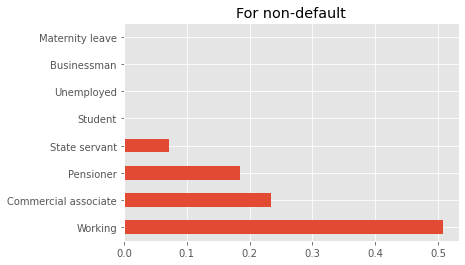

In [63]:
target0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('For non-default')
plt.show()

#### For target 1

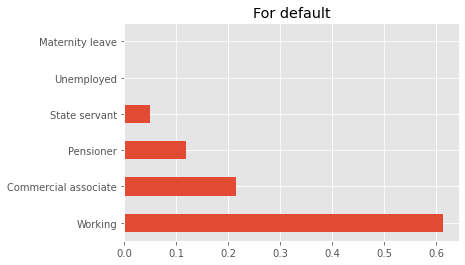

In [64]:
target1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('For default')
plt.show()

> From the graphs above, we can conclude that Pensioner of non default case are high in number compared to Pensioner of default case.It seems there exists both loss and profit due to Pension people to the Bank.

>It also shows that majority of defaulters income type is working,and at the same time there is good income to bank from working people.

### NAME_HOUSING_TYPE
#### For TARGET=0

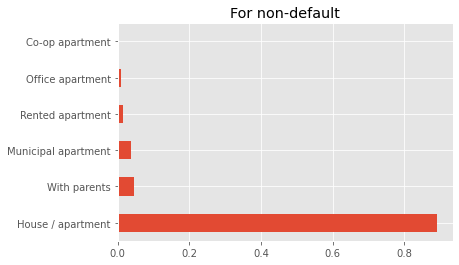

In [65]:
target0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('For non-default')
plt.show()

### For target 1

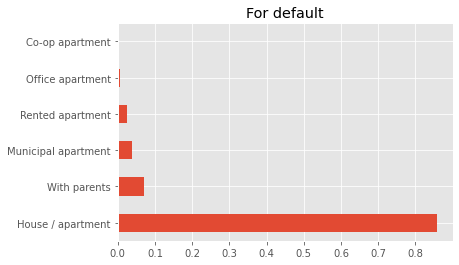

In [66]:
target1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('For default')
plt.show()

>From graph we can conclude that there exists people who live in House/apartment lies in both default and non default.

### Compare the target variable across the categories of categorical variables against Target 0 and 1

In [67]:
#considering 10 categorical columns
categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'WEEKDAY_APPR_PROCESS_START','AMT_CREDIT_bin','AMT_INCOME_TOTAL_bin']


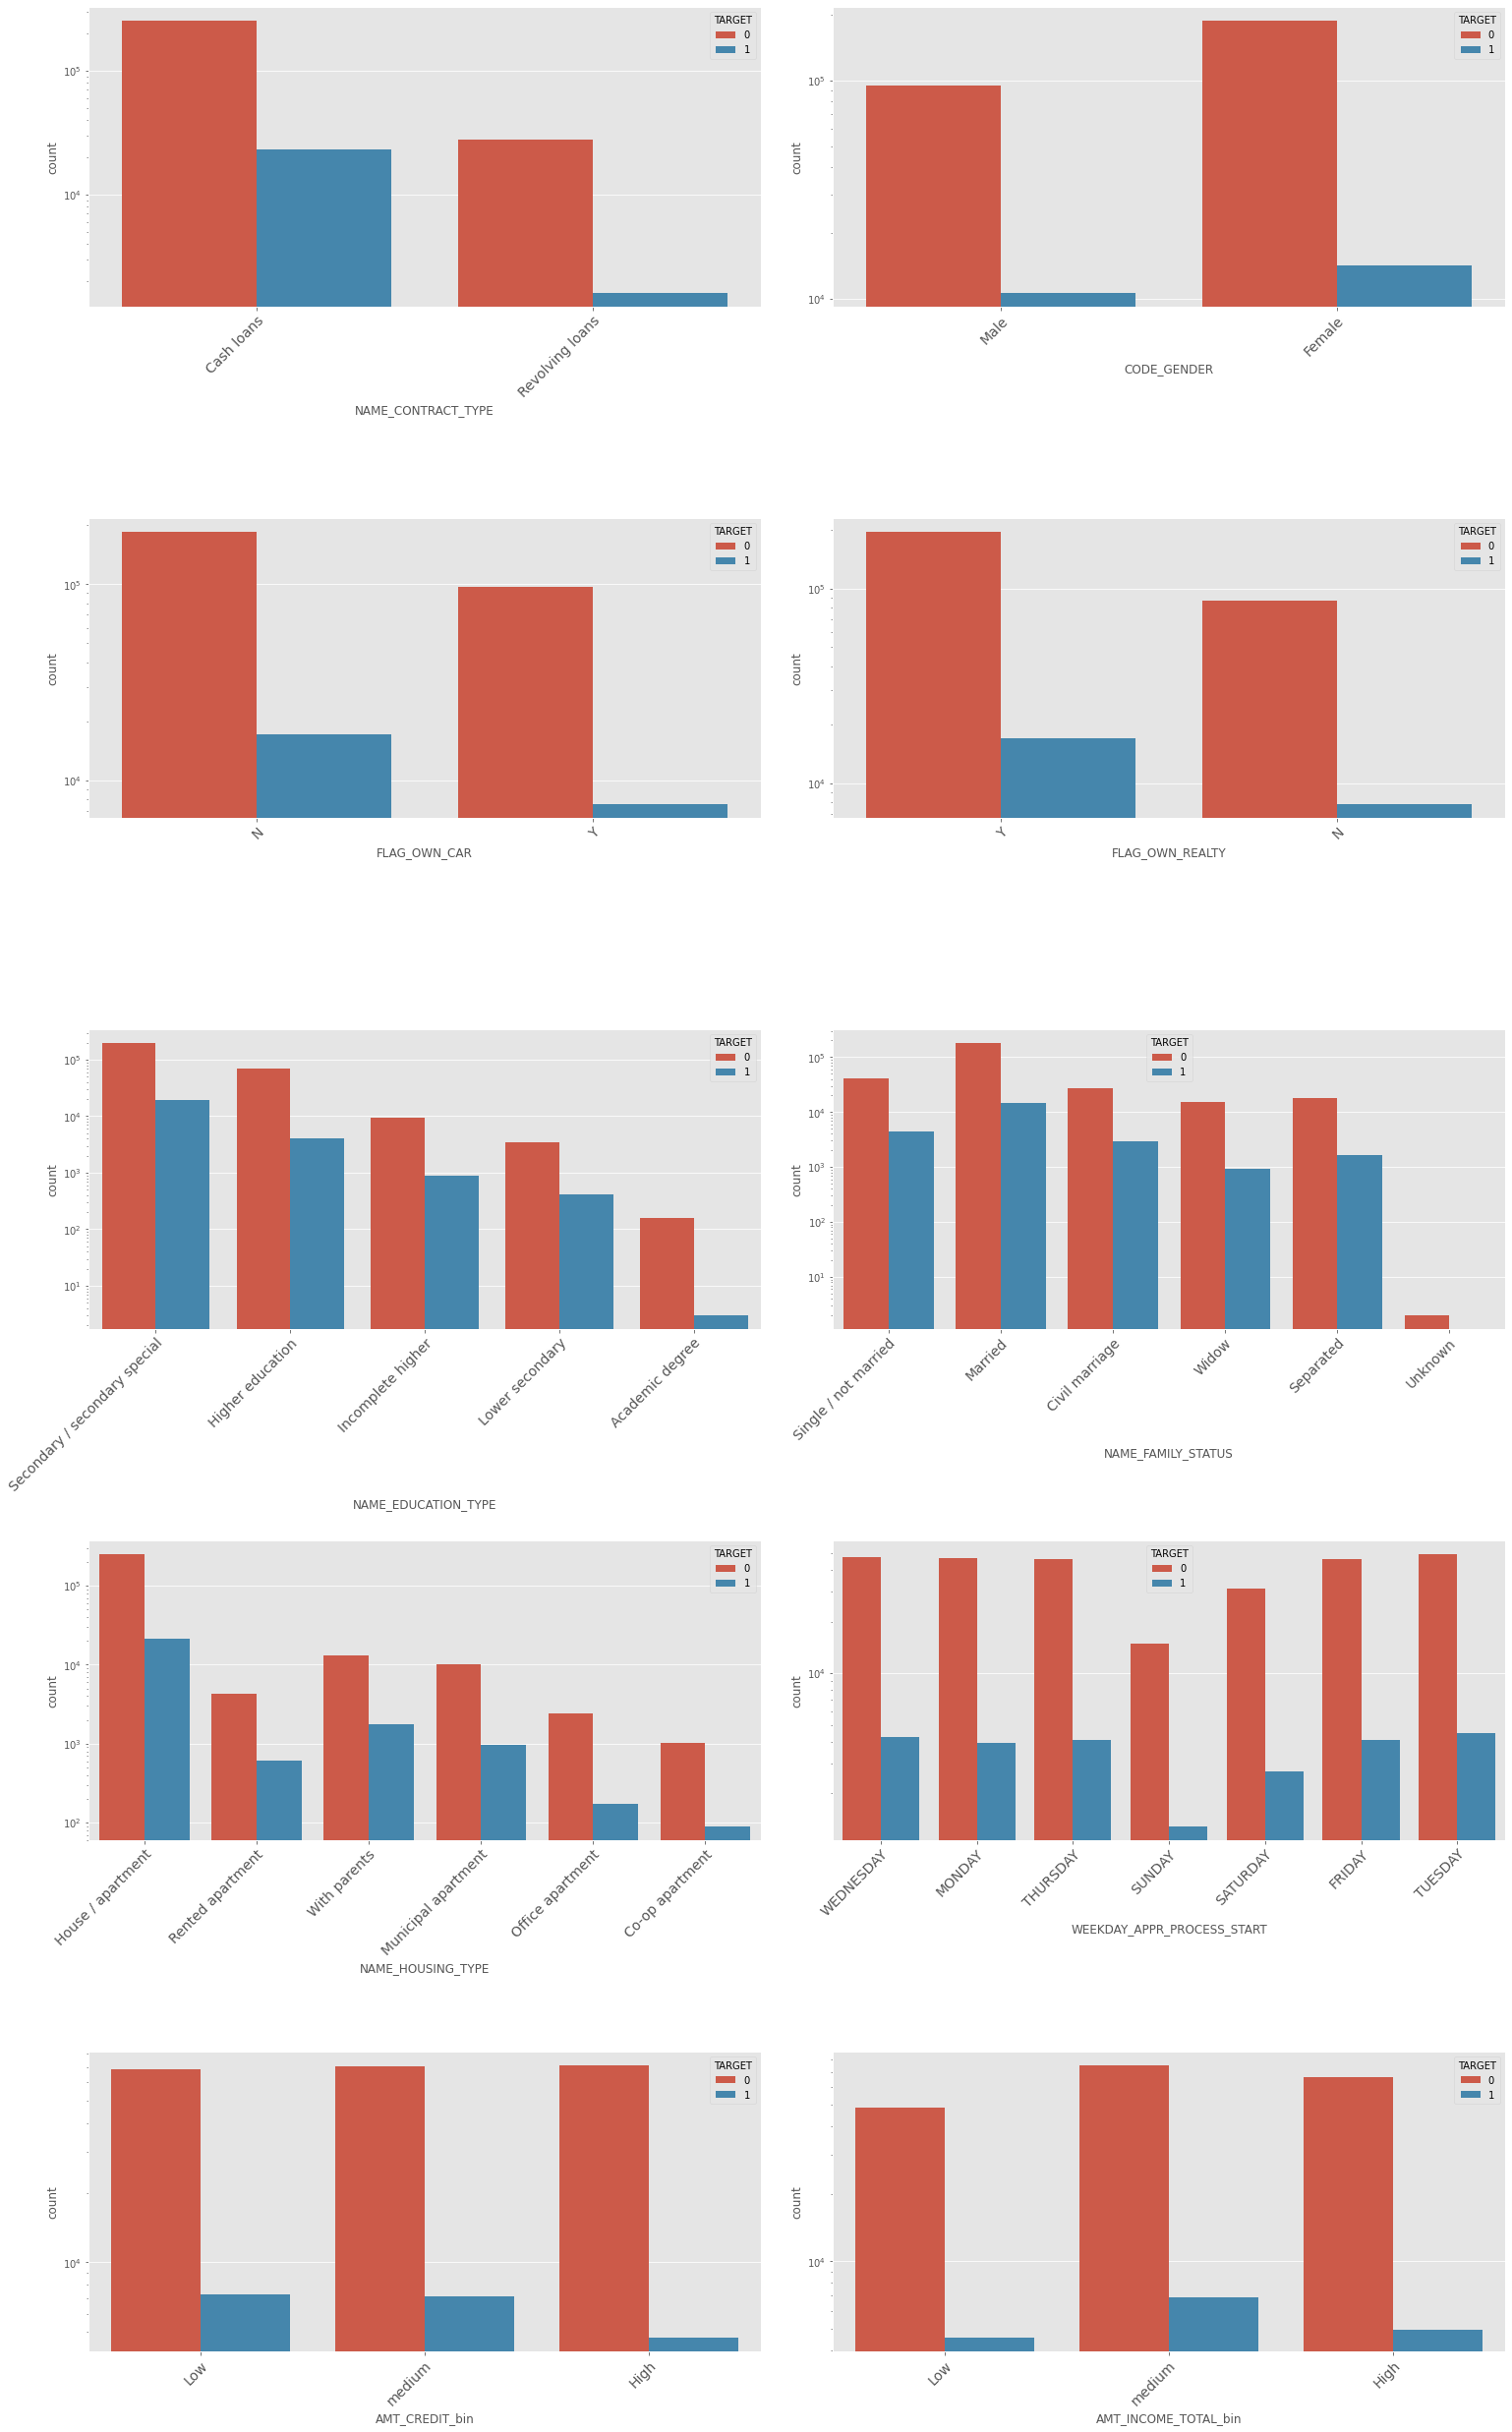

In [68]:

plt.figure(figsize=(22,35))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=inp0)
    plt.yscale('log')
    plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=14)
    plt.tight_layout(pad=3.0)
   
plt.show()


**Insights**

#### As we can see from graphs

- People with Medium total income are more likely to default
- People with high Credit amount are less likely to default
- People who started application process on sunday are less likely to default
- Saturday and sunday are less busy for bank in terms of loan applications
- People with house or appartment tend to take more loans
- We can say more married people tend to take more Loan as compaired to other categories
- We can conclude that secondary/special educated people are applying loans in high in number
- People with real estate tends to take more loans
- People who don't own a car tends to take more loans
- Female tends to take more loans
- People tend to take more cash loans, and default percentage of revolving loans is less

### Compare the target variable across the numerical variables against Target 0 and 1

In [69]:
#considering 10 continous numerical columns
continous_columns=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_BIRTH','HOUR_APPR_PROCESS_START',
                  'DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']

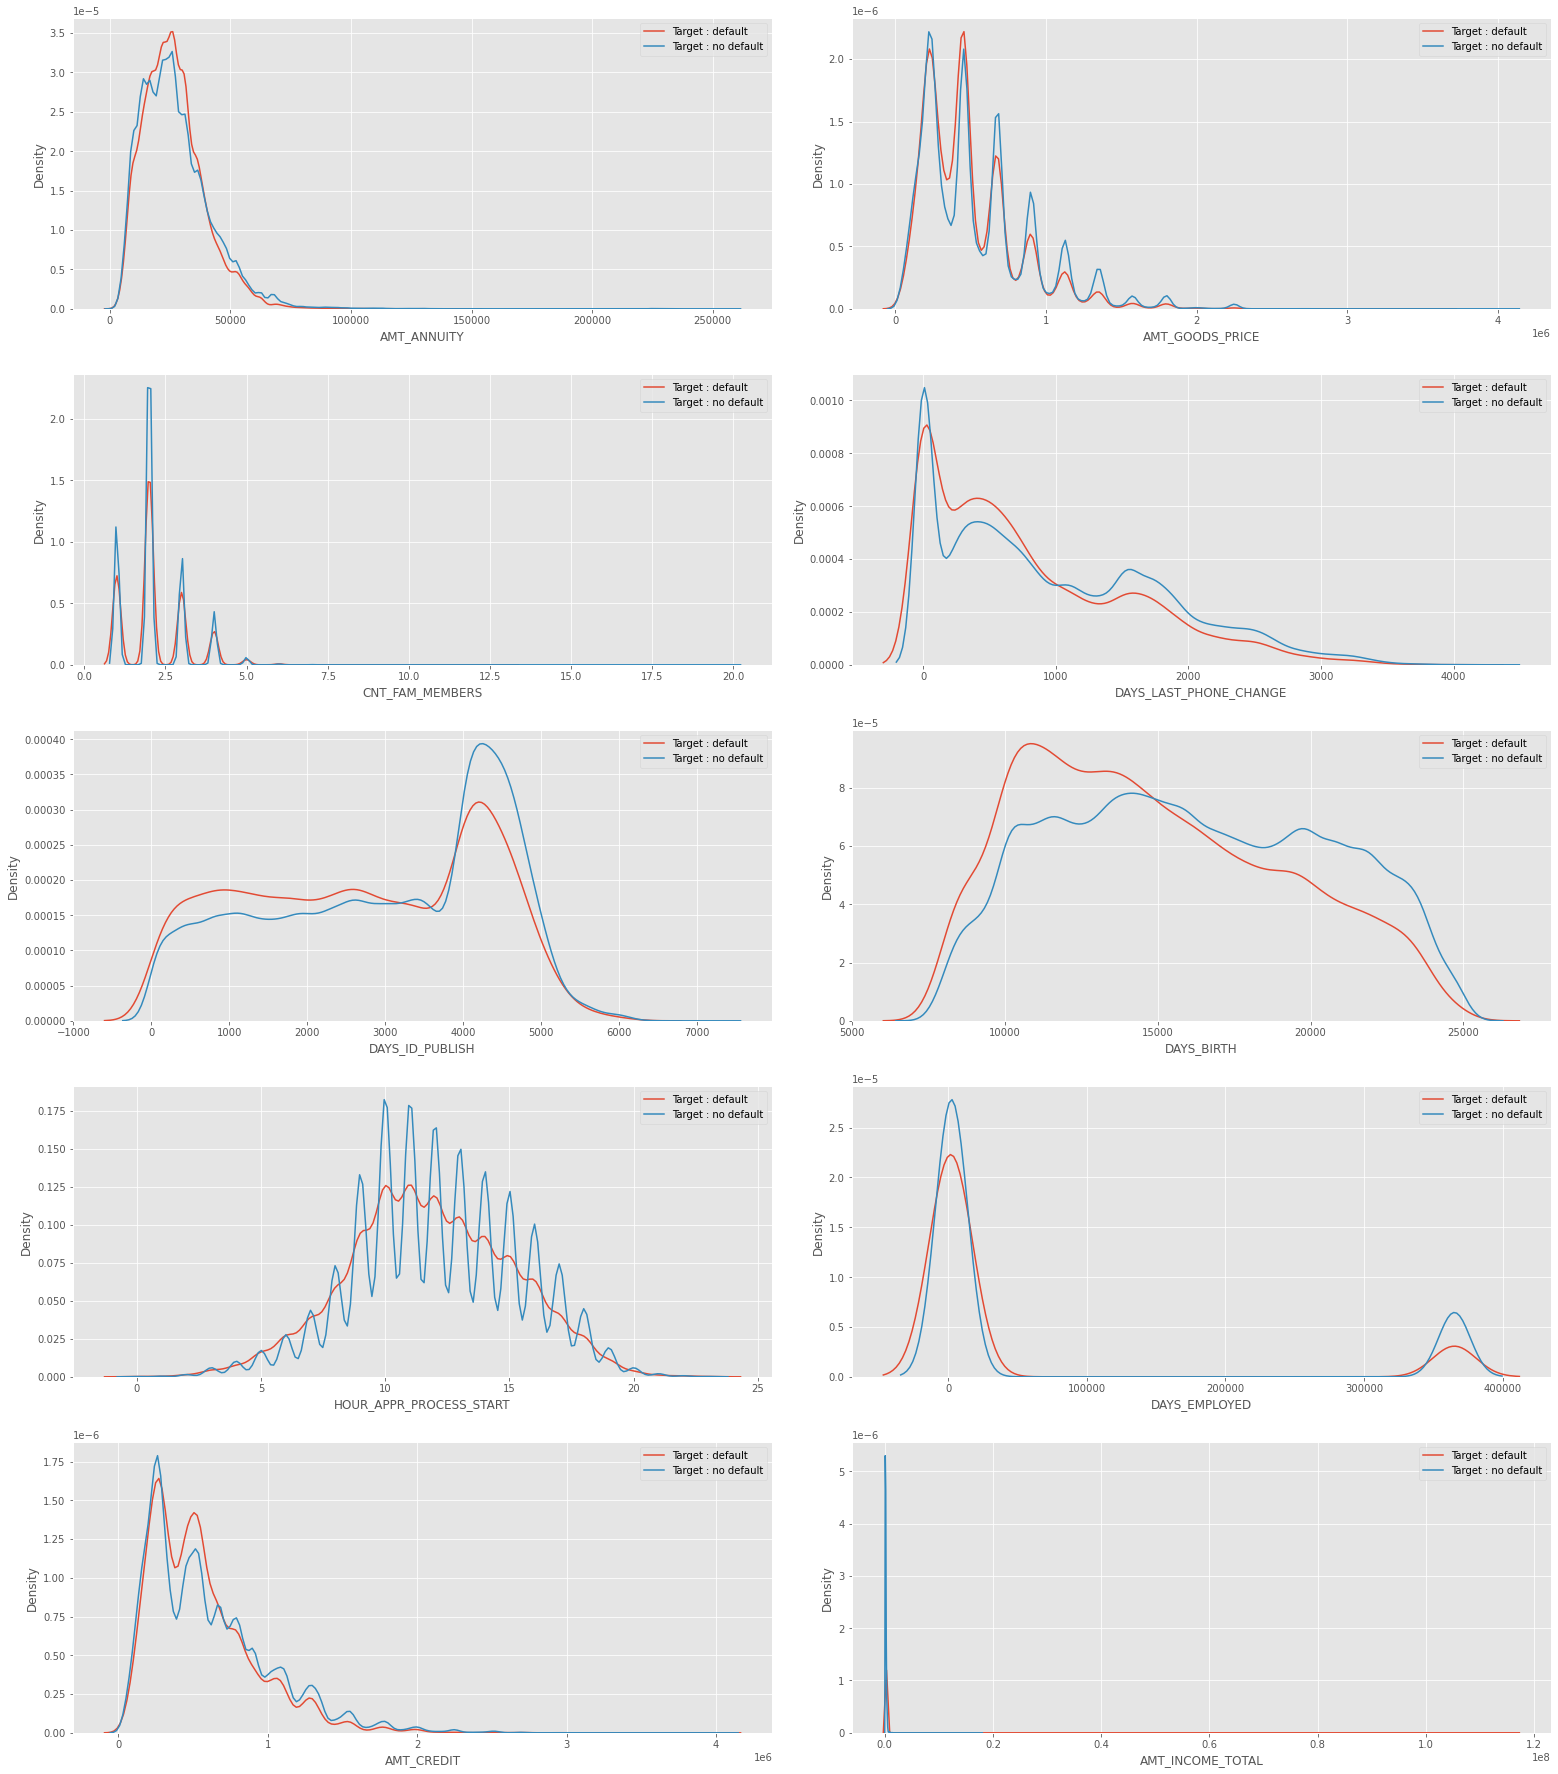

In [70]:
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(target1[i[1]].dropna(),hist=False, label='Target : default')
    sns.distplot(target0[i[1]].dropna(),hist=False, label='Target : no default')
   # plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=14)
    plt.tight_layout(pad=2.0)
    plt.legend()
plt.show()  

**Insights**

### As we can see from graphs

- People with lower total income are more likely to default
- People who just got employed tends to take more loans
- People who retired tends to take more loans
- High number of applications are filed in 10 AM to 2 PM
- People with age between 27yrs(10000-days) and 41(15000-days) yrs tend to take more loans
- People whose id(s) got published between 4000 days and 5000 days ago tend to take more loans
- Nuclear family tends to take more loans
- For less goods amount people take loans
- Low amount annuity has high number of loans

### Correlation

### Analysing correlation for numerical columns for both Target 0 and Target1

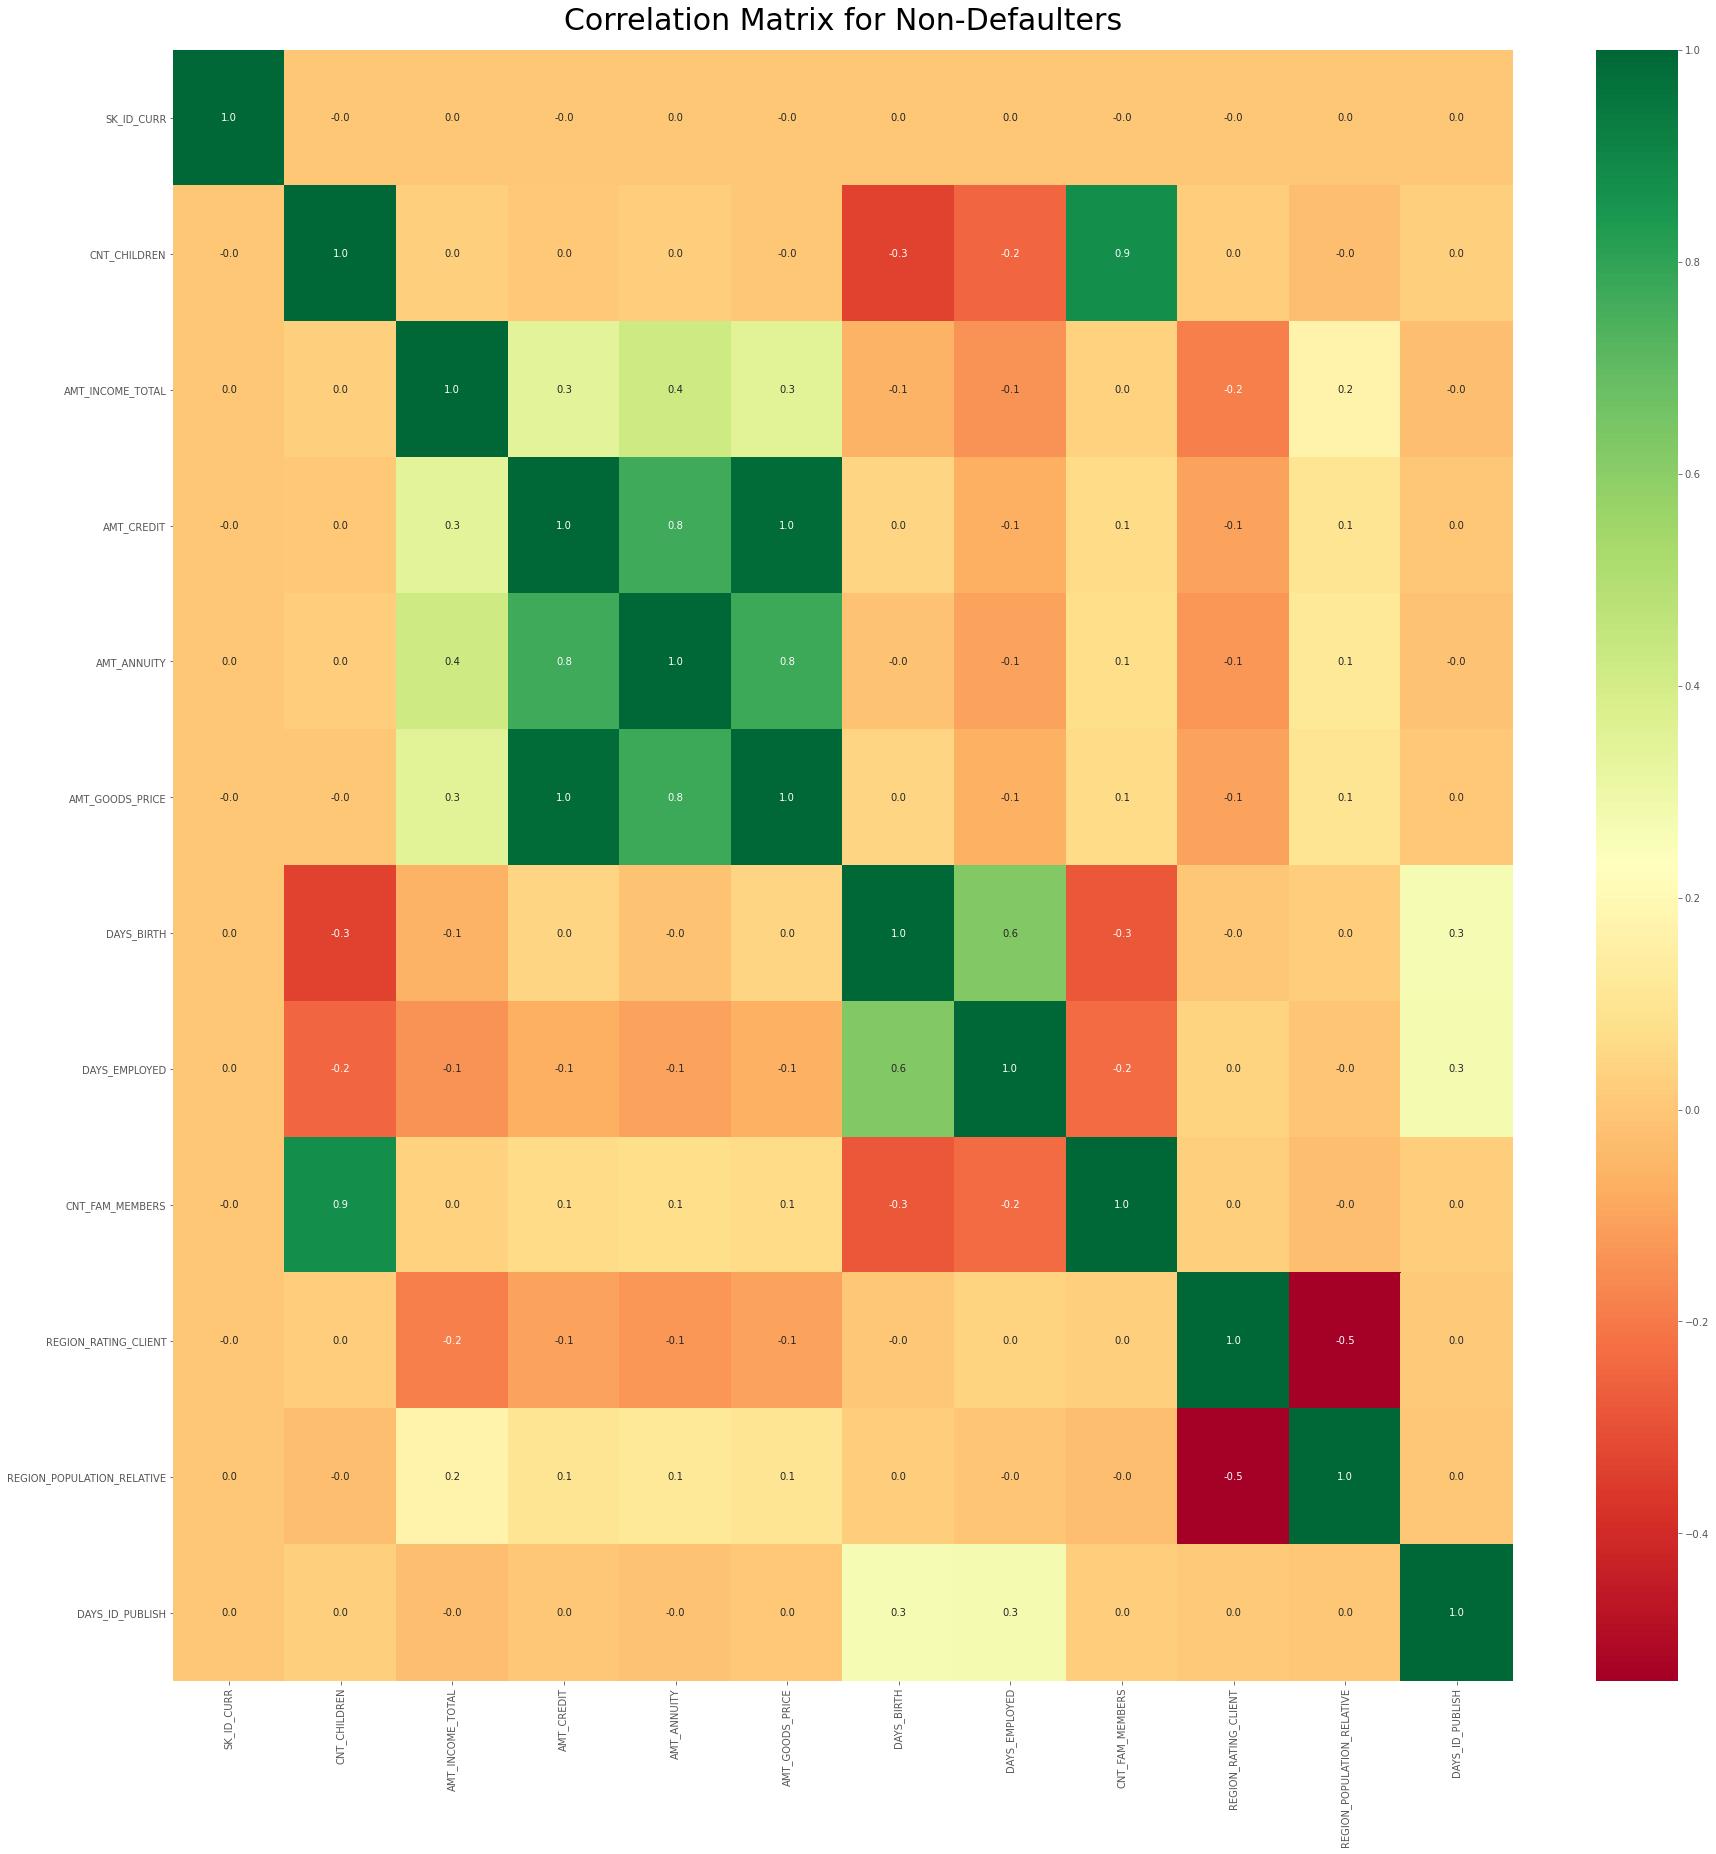

In [71]:
#Plotting Correlation matrix for Target 0 application data
d=target0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(30,30))
sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.title("Correlation Matrix for Non-Defaulters",fontsize=30, pad=20 )
plt.show()

**Inference:**<br>These columns have high correlation values for Target 0.<br><br>
AMT_GOODS_PRICE and AMT_CREDIT<br>AMT_ANNUITY and AMT_CREDIT<br>AMT_ANNUITY and AMT_GOODS_PRICE<br>CNT_FAM_MEMBERS and CNT_CHILDREN<br>AMT_ANNUITY and AMT_INCOME_TOTAL<br>AMT_INCOME_TOTAL and AMT_GOODS_PRICE

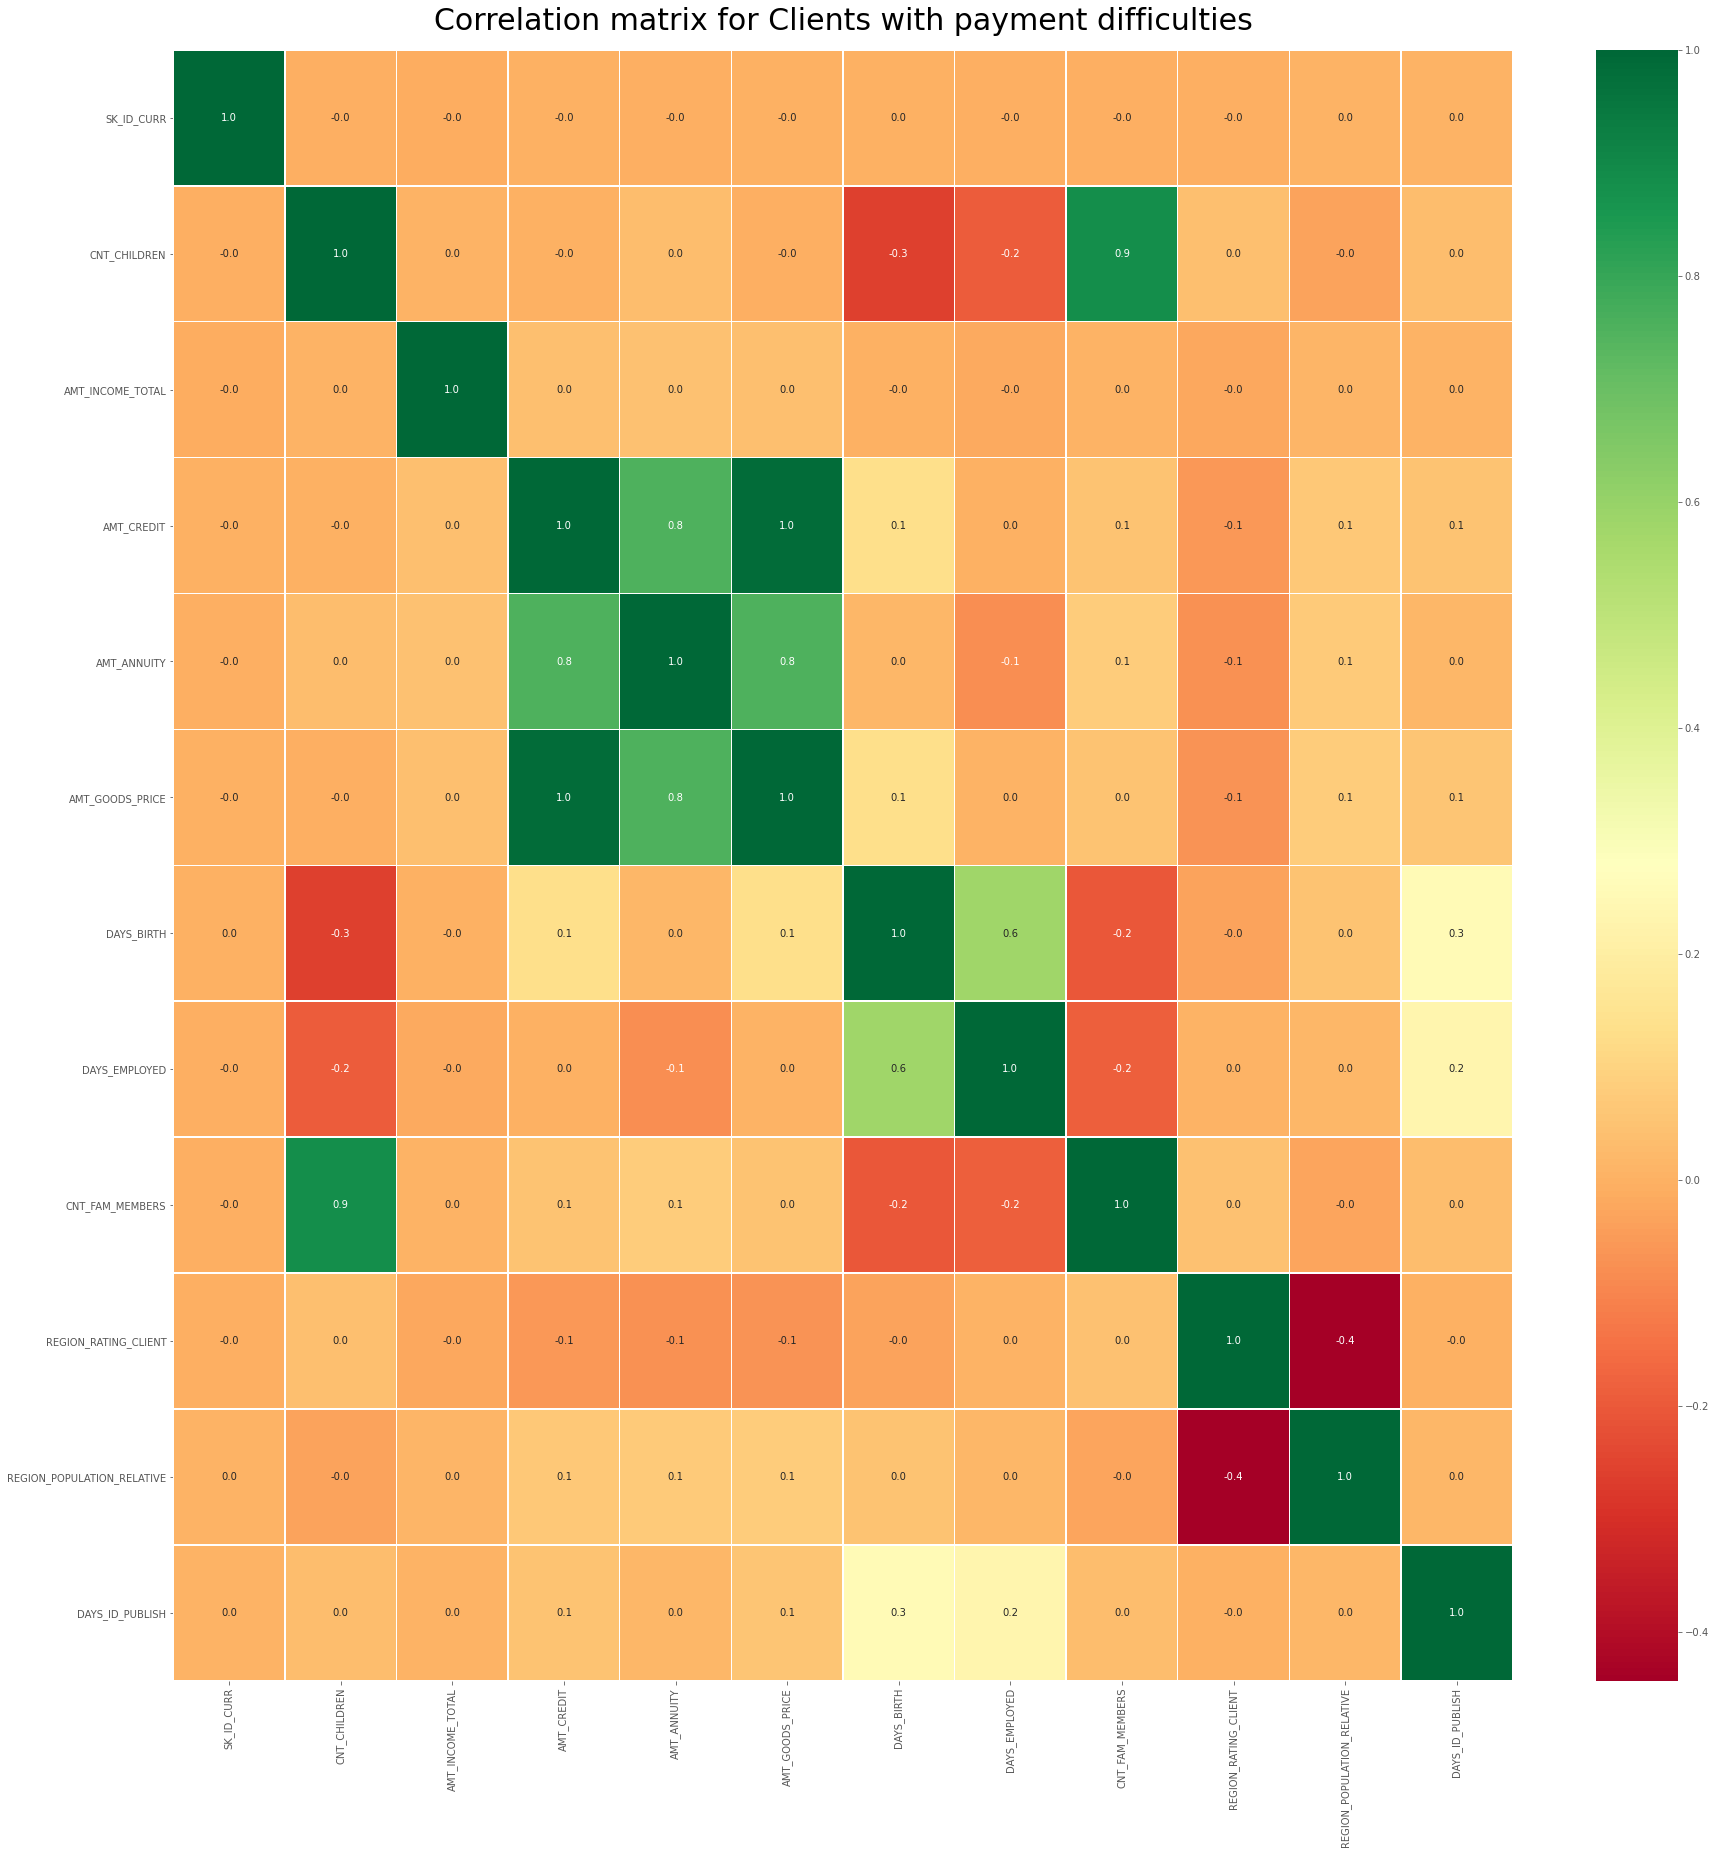

In [72]:
#Plotting Correlation matrix for Target 1 application data
d=target1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)
plt.title("Correlation matrix for Clients with payment difficulties",fontsize=30, pad=20 )
plt.show()

**Inference:<br>**Both for Target 0 and Target 1 these columns have high correlation values.<br><br>
AMT_GOODS_PRICE and AMT_CREDIT<br>AMT_ANNUITY and AMT_CREDIT<br>AMT_ANNUITY and AMT_GOODS_PRICE<br>CNT_FAM_MEMBER and CNT_CHILDREN<br>AMT_ANNUITY and AMT_INCOME_TOTAL<br>AMT_INCOME_TOTAL and AMT_GOODS_PRICE

### Bivariate Analysis

### Bi-variate categorical plots

In [73]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low


NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       255011            27671
1                        23221             1604


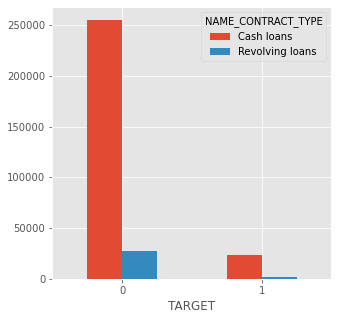

In [74]:


table_1= pd.crosstab(index=inp0['TARGET'],columns=inp0['NAME_CONTRACT_TYPE'])
print(table_1)
table_1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()
# High number of cash loans

CODE_GENDER  Female   Male
TARGET                    
0            188278  94404
1             14170  10655


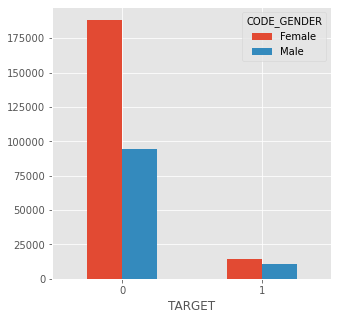

In [75]:
table_2= pd.crosstab(index=inp0['TARGET'],columns=inp0['CODE_GENDER'])
print(table_2)
table_2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()
#Females take more loans

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  \
TARGET                                                                 
0                    3026   37139              248      790     1596   
1                     241    3009               23       76      174   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied   nan  
TARGET                                                 
0                          10475         228186  1222  
1                            895          20337    70  


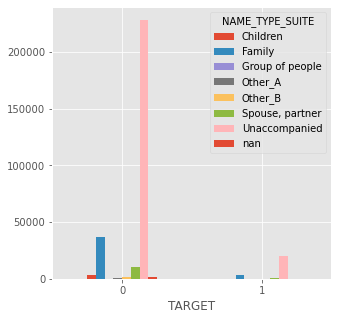

In [76]:
table_3= pd.crosstab(index=inp0['TARGET'],columns=inp0['NAME_TYPE_SUITE'])
print(table_3)
table_3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()
# Most of the people come alone when taking a loan

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66256                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     52380          20454       18          14   143547  
1                      2982           1249        0           8    15224  


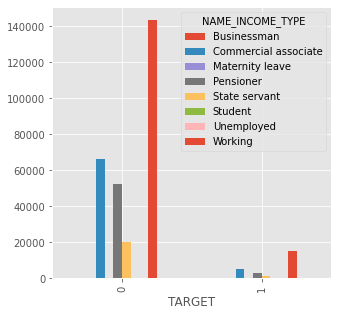

In [77]:
table_4= pd.crosstab(index=inp0['TARGET'],columns=inp0['NAME_INCOME_TYPE'])
print(table_4)
table_4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# working people take more loans

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                             1033             251593                10227   
1                               89              21272                  955   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                              2445              4280         13104  
1                               172               601          1736  


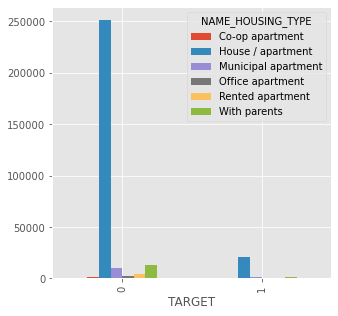

In [78]:
table_5= pd.crosstab(index=inp0['TARGET'],columns=inp0['NAME_HOUSING_TYPE'])
print(table_5)
table_5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# People having house/appartment tend to take more loans

### Bi-variate continuous plots

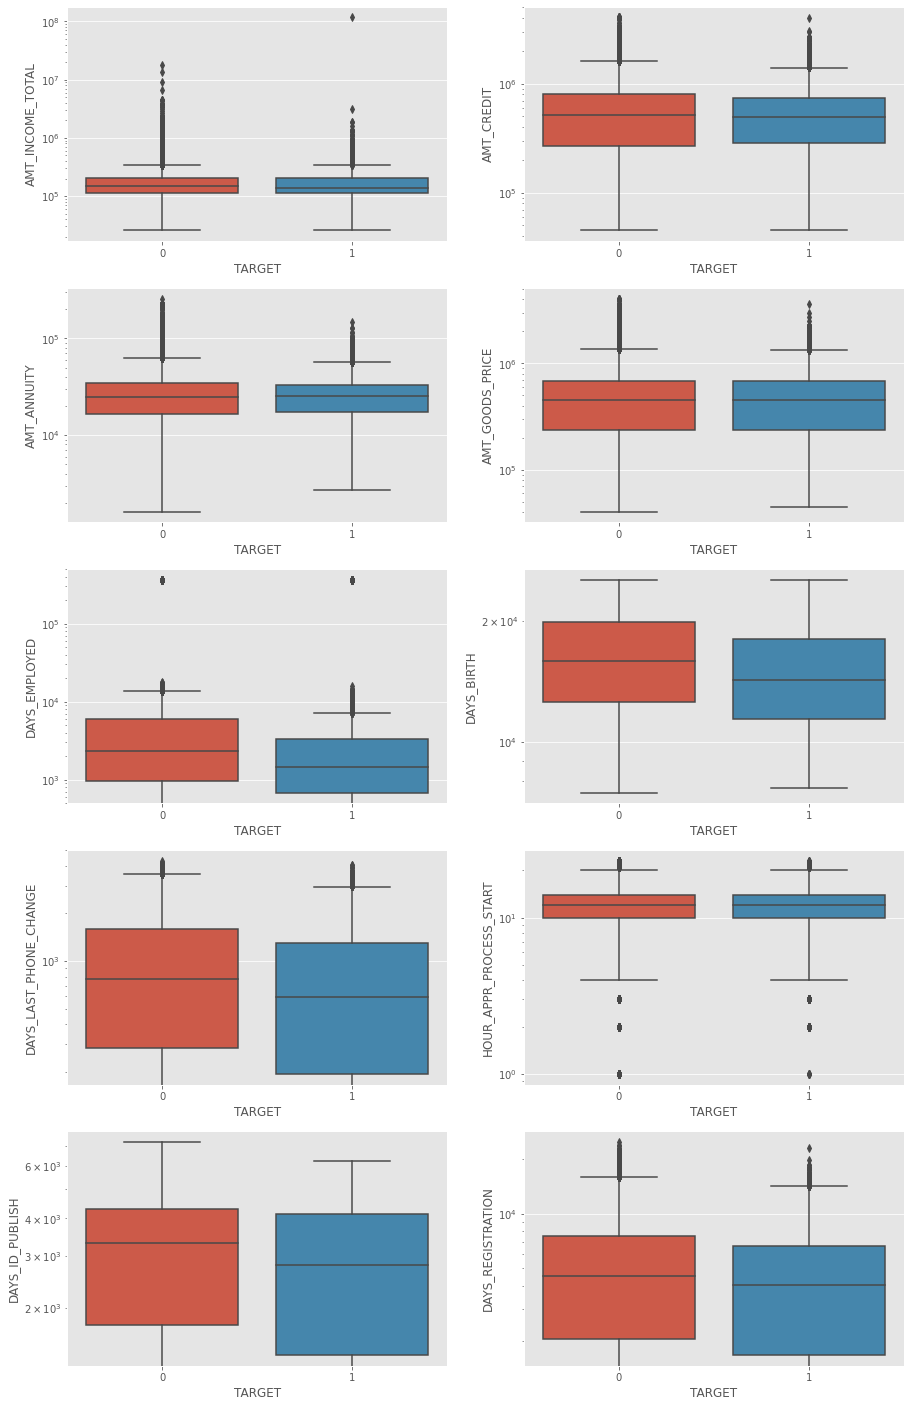

In [79]:
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=inp0[i[1]].dropna(),data=inp0)
    plt.yscale('log')
plt.show() 

**Insights**

- There exists more clients who changed their their registration details after 4000 days of approval of loan.
- For few not default clients, time taken to publish id's are higher than default clients.
- The application process start hours taken for default and not default cases are similar.
- In non default cases, people keep their phone numbers for greater time.
- People with greater number of days born count are less likely to default.
- In non default case AMT_GOODS PRICE contains more outlers than default case.
- In default case, most of the clients amount annuity tends to be greater than 25000(median value).
- Whose credit amount is greater than 50000 tends to be less default than compared to default cases and vice versa.
- People with higher no of employment days are less likely to default.
- Majority of defaulting people are having less total income.

### Reading Previous application data

In [80]:
inp1=pd.read_csv("previous_application.csv")

In [81]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#check shape of the dataframe
inp1.shape

(1670214, 37)

In [83]:
#check info of the dataframe
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [84]:
# checking of missing values percentage
round((100*inp1.isnull().sum()/len(inp1)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [85]:
 #removing those columns which are having null percentage greater than 50
# AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED 
inp1=inp1.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis = 1)
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [86]:
#converting -ve values to +ve
inp1['DAYS_DECISION']=inp1['DAYS_DECISION'].abs()
inp1['SELLERPLACE_AREA']=inp1['SELLERPLACE_AREA'].abs()
inp1['DAYS_FIRST_DUE']=inp1['DAYS_FIRST_DUE'].abs()
inp1['DAYS_LAST_DUE_1ST_VERSION']=inp1['DAYS_LAST_DUE_1ST_VERSION'].abs()
inp1['DAYS_LAST_DUE']=inp1['DAYS_LAST_DUE'].abs()
inp1['DAYS_TERMINATION']=inp1['DAYS_TERMINATION'].abs()
inp1['DAYS_FIRST_DRAWING']=inp1['DAYS_FIRST_DRAWING'].abs()

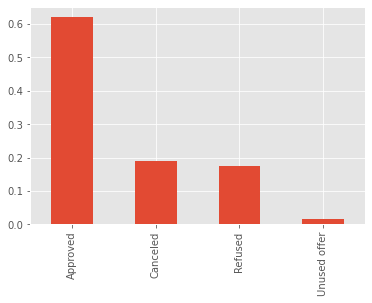

In [87]:
(inp1.NAME_CONTRACT_STATUS.value_counts()/len(inp1)).plot.bar()
plt.show()

**Merging application data and previous application data**

> Here we are making a left join because we need all the rows in application data by making this left join we get historical application data for each applicant.If we made an inner join we would loose the data of a new customer who doesn't have a previous record. Current data will get duplicated the exact number of times it is found in previous application data with this in mind we are moving forward.

In [88]:
merged_df=pd.merge(inp0,inp1,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,NAME_TYPE_SUITE_Current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_bin,AMT_CREDIT_bin,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_Previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,medium,Low,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,High,2636178.0,Consumer loans,64567.665,337500.0,348637.5,33750

### Univariate Categorical analysis

In [89]:
categorical_columns=['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous',
                     'NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous',
                     'WEEKDAY_APPR_PROCESS_START_Current','WEEKDAY_APPR_PROCESS_START_Previous',
                    'AMT_INCOME_TOTAL_bin','AMT_CREDIT_bin','NAME_YIELD_GROUP','NAME_CLIENT_TYPE']


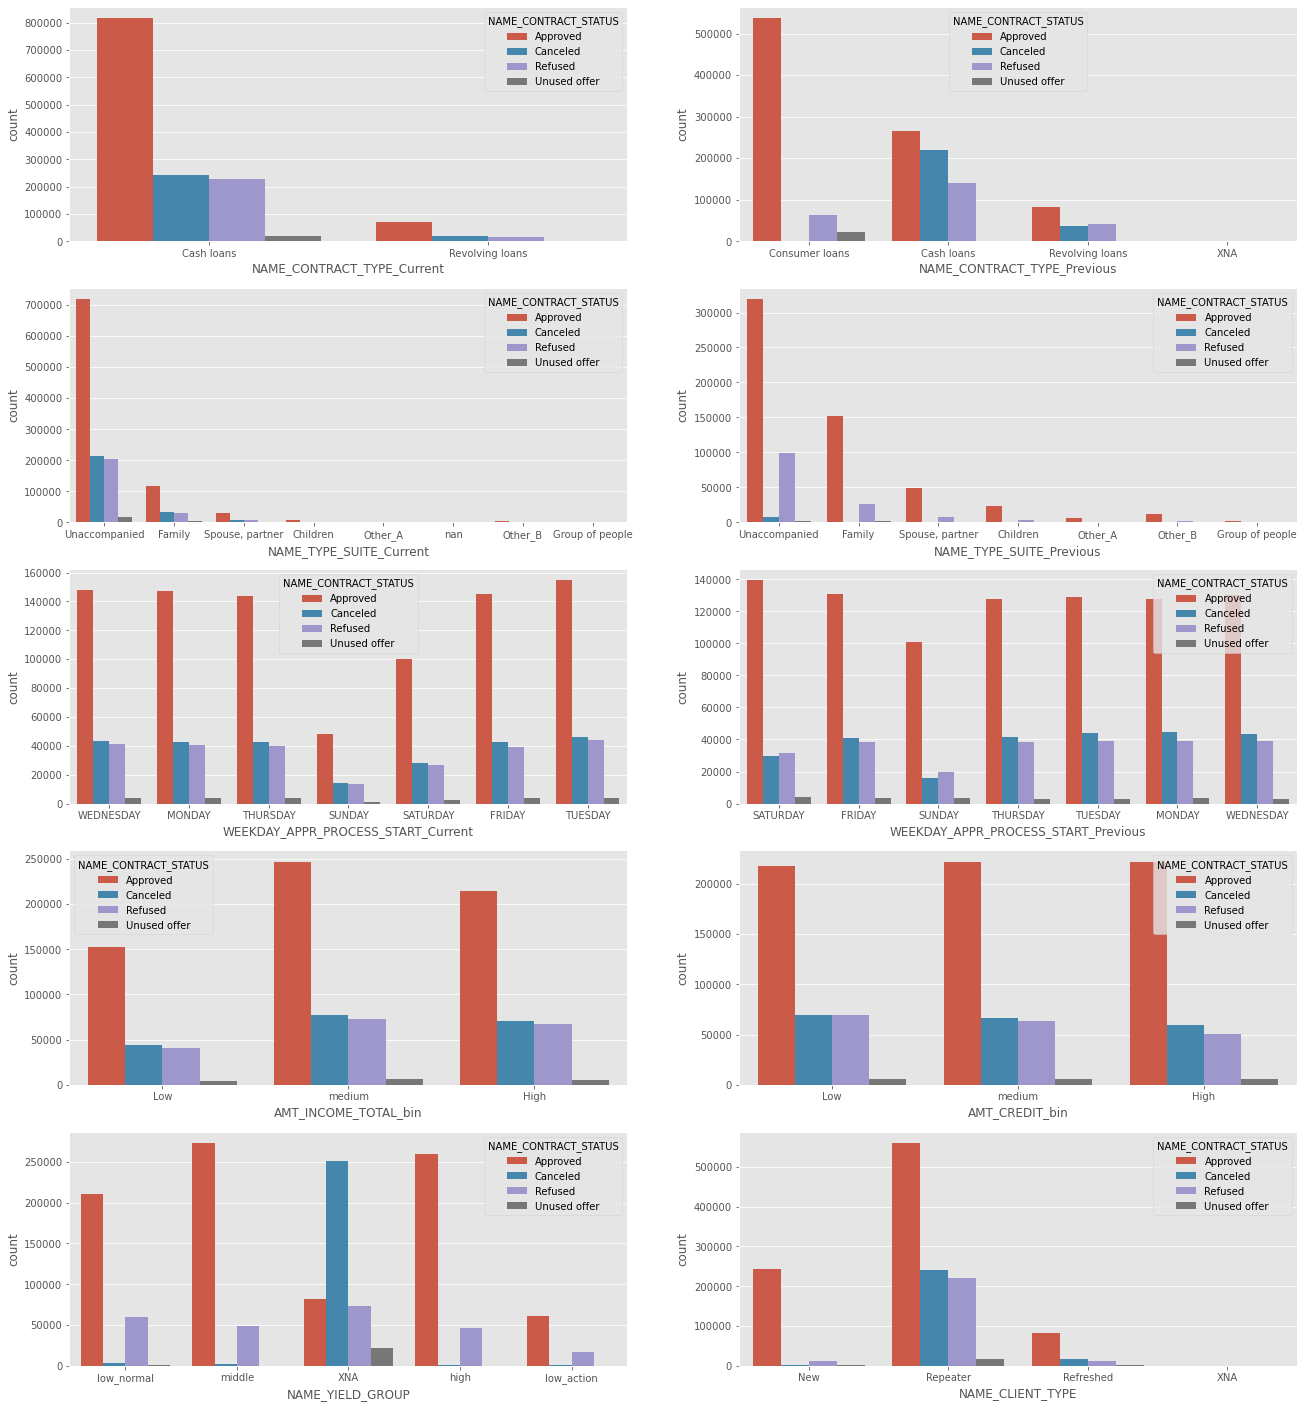

In [90]:
plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_df)
    #lt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()

**Insights**
- Repeater has highest number of approved loans.
- Middle NAME_YIELD_GROUP has highest approval.
- Value of AMT_CREDIT_BIN does not affect loan approvals.
- For Medium AMT_INCOME_TOTAL_bin the approval is highest .
- In previous application saturday has the highest approval rate ,but in current application it is tuesday.
- Both in NAME_CONTRACT_TYPE_Previous and NAME_CONTRACT_TYPE_Current unaccompanied has the highest number.
- Currently bank is only giving two types of loans -Cash and Revolving Loans.Previously bank was providing Cash, Revolving and Consumer loans.
- Number of consumer loans were highest previously and now highest number is Cash loans.

### Continous/Numerical analysis

In [91]:
continous_columns=['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current']

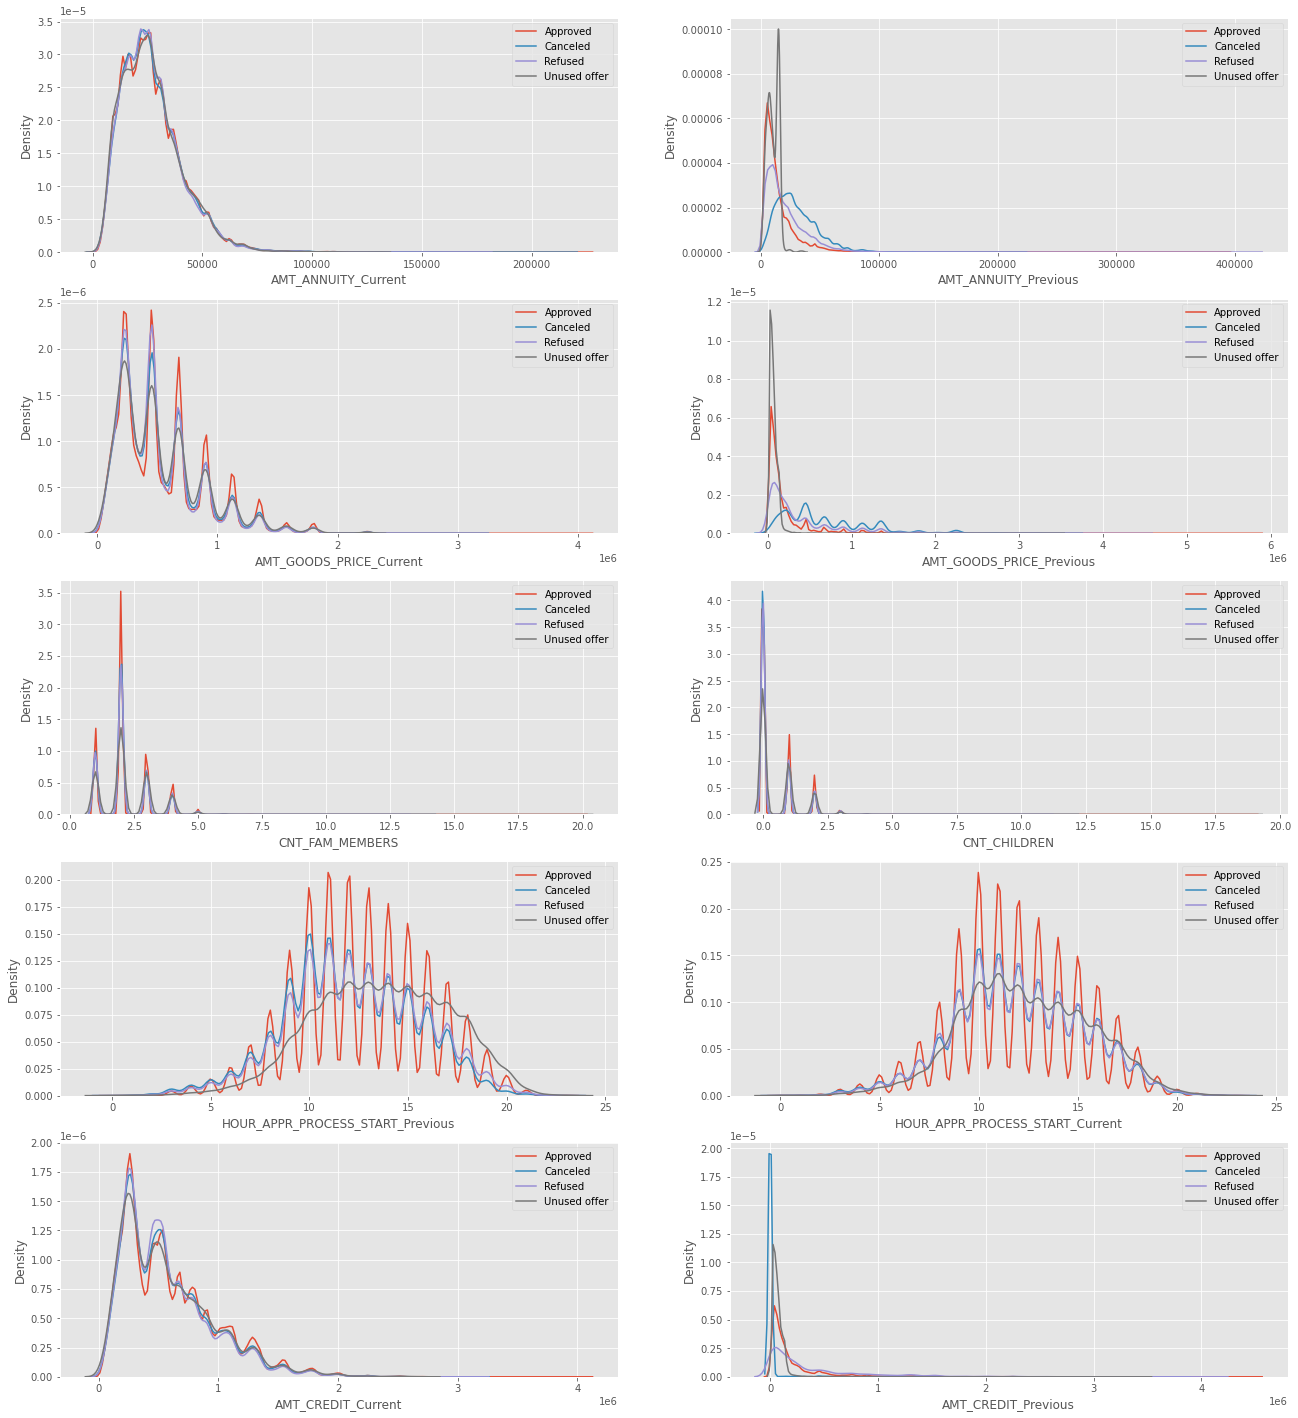

In [105]:
plt.figure(figsize=(22,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1})
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1})
    # we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.
    sns.distplot(merged_df.loc[merged_df.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')
    plt.legend()

plt.show()

**Insights**
As we can see from the graphs

- High number of applications are filed in 9 AM to 2 PM for both Current and Previous data.So busiest hours for bank are form 9 AM to 2 PM.
- Nuclear family tends to take more loans.
- Previously bank had high unused offers but currently refused is high incase of AMT_GOODS_PRICE.
- Previously bank had high unused offers and currently cancelled/refused offers are similar for AMT_ANNUITY.
- Previously bank had high unused offers and currently high number of refused offers for AMT_CREDIT.

### Bi-variate Analysis Categorical

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        816571            69505
Canceled                        241552            17882
Refused                         228351            17014
Unused offer                     20641             2130


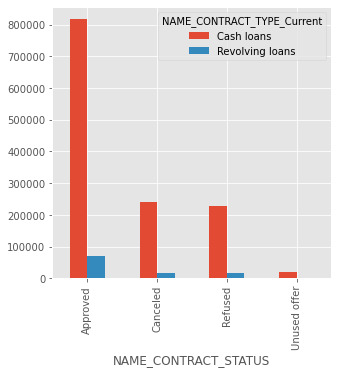

In [96]:
table_6= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Current'])
print(table_6)
table_6.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
#Cash loans have the highest count of Approved loans

NAME_INCOME_TYPE      Commercial associate  Maternity leave  Pensioner  \
NAME_CONTRACT_STATUS                                                     
Approved                            198497               10     170144   
Canceled                             59779                2      57674   
Refused                              58110                3      43802   
Unused offer                          5072                1       1924   

NAME_INCOME_TYPE      State servant  Student  Unemployed  Working  
NAME_CONTRACT_STATUS                                               
Approved                      61630       20          68   455707  
Canceled                      15679        3          16   126281  
Refused                       15597        1          38   127814  
Unused offer                   1518        0           1    14255  


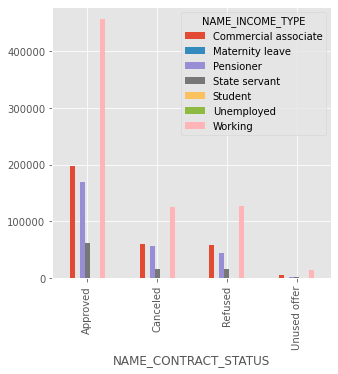

In [97]:
table_9= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_INCOME_TYPE'])
print(table_9)
table_9.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for working applicant

NAME_EDUCATION_TYPE   Academic degree  Higher education  Incomplete higher  \
NAME_CONTRACT_STATUS                                                         
Approved                          418            194997              27666   
Canceled                           64             57073               7911   
Refused                            91             54046               8628   
Unused offer                        6              6718                983   

NAME_EDUCATION_TYPE   Lower secondary  Secondary / secondary special  
NAME_CONTRACT_STATUS                                                  
Approved                        10929                         652066  
Canceled                         3099                         191287  
Refused                          2971                         179629  
Unused offer                      165                          14899  


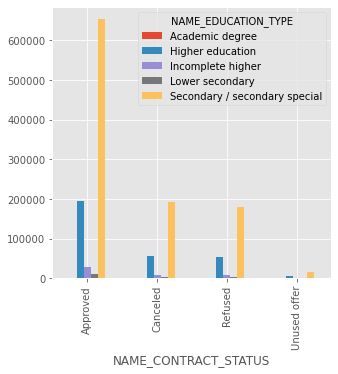

In [98]:
table_10= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_EDUCATION_TYPE'])
print(table_10)
table_10.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for Secondary/secondary special educated applicant

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       86817   577124      56750   
Canceled                       26137   167232      16535   
Refused                        28219   152149      16453   
Unused offer                    1961    14373       1600   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                            114880  50505  
Canceled                             33403  16127  
Refused                              34292  14252  
Unused offer                          4082    755  


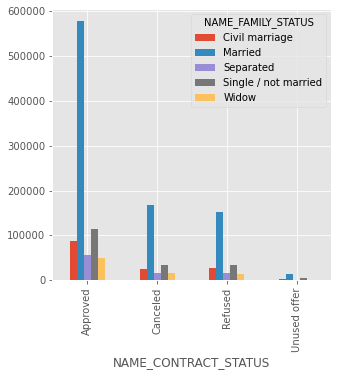

In [99]:
table_11= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_FAMILY_STATUS'])
print(table_11)
table_11.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for Married applicant

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2788             791646                33136   
Canceled                          629             234113                 9149   
Refused                           659             219277                 8543   
Unused offer                      313              19864                  702   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          7319             12608         38579  
Canceled                          1926              3385         10232  
Refused                           2005              3514         11367  
Unused offer                       178               278          1436  


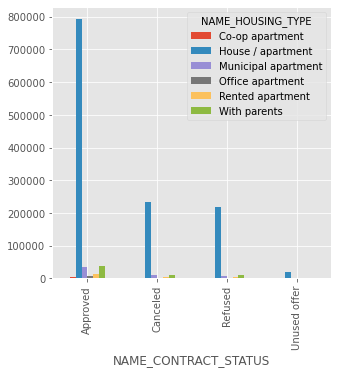

In [100]:
table_12= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_HOUSING_TYPE'])
print(table_12)
table_12.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for House/apartment owner.

NAME_CONTRACT_TYPE_Previous  Cash loans  Consumer loans  Revolving loans  XNA
NAME_CONTRACT_STATUS                                                         
Approved                         266372          537296            82408    0
Canceled                         220377            1329            37444  284
Refused                          139560           64279            41497   29
Unused offer                        432           22335                4    0


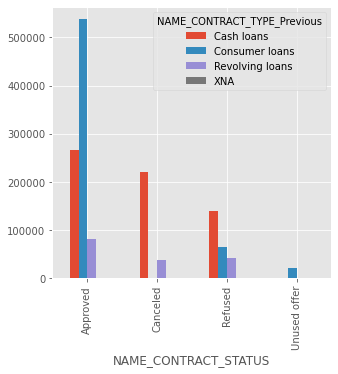

In [101]:
table_13= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CONTRACT_TYPE_Previous'])
print(table_13)
table_13.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# Highest number of approvals for Consumer Loans.

NAME_CLIENT_TYPE         New  Refreshed  Repeater  XNA
NAME_CONTRACT_STATUS                                  
Approved              242391      82889    560361  435
Canceled                2920      16104    239611  799
Refused                12355      12536    220194  280
Unused offer            1867       3404     17471   29


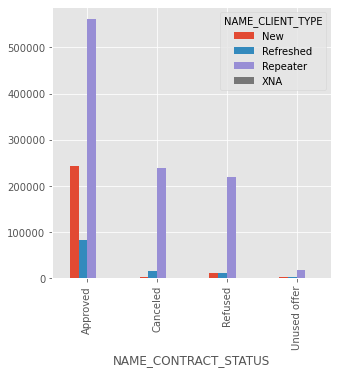

In [102]:
table_14= pd.crosstab(index=merged_df['NAME_CONTRACT_STATUS'],columns=merged_df['NAME_CLIENT_TYPE'])
print(table_14)
table_14.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()
# repeated applications got approved most number of times

### Bivariate Continous/Numerical analysis

In [103]:
continous_columns=['AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current',
                   'AMT_CREDIT_Current','AMT_CREDIT_Previous']

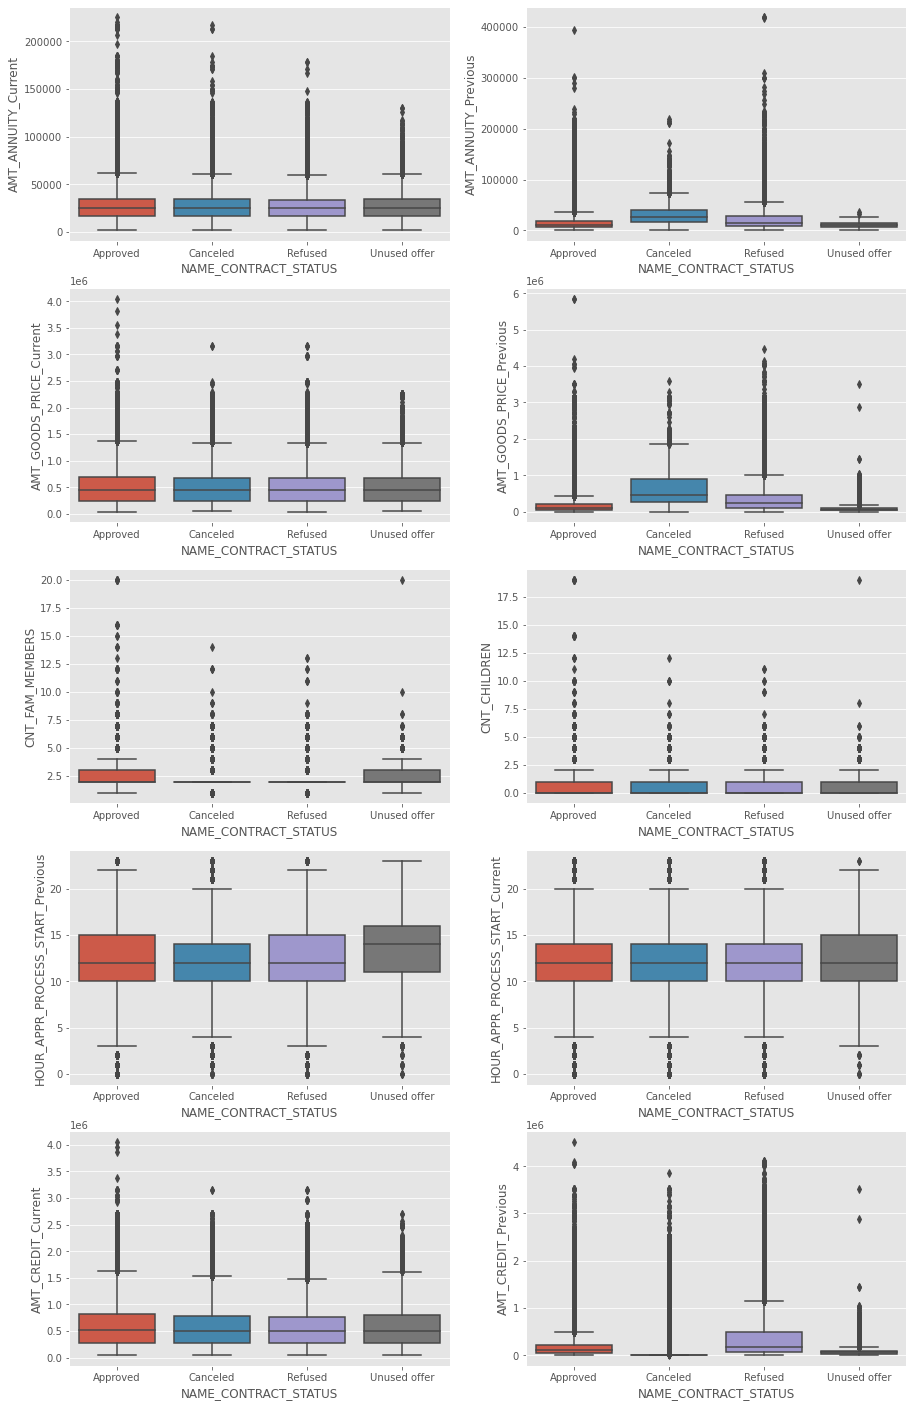

In [104]:
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_df[i[1]].dropna(),data=merged_df)
plt.show() 

**Insights**
- AMT_CREDIT_Previous has highest refused cases and AMT_CREDIT_Current is similar for all 4 cases.
- Time spent in unused offer is higher as compared to other categories. So bank should reduce time spent on unused offer.
- Nuclear family(2-3 people in family) get highest approval.
- Previously most of the applications were cancelled or refused but now Refused/Cancelled/Approved/Unused all four have similar situation for AMT_GOODS_PRICE.
- Previously most of the applications were cancelled or refused but now Refused/Cancelled/Approved/Unused all four have similar situation for AMT_ANNUITY.

### Thus we can conclude that

- Target/focused variable for Application dataset - TARGET
- Target/focused variable for Previous dataset - NAME_CONTRACT_STATUS

**The top variables to consider for loan prediction are:**

1. NAME_EDUCATION_TYPE
2. AMT_INCOME_TOTAL
3. DAYS_BIRTH
4. AMT_CREDIT
5. DAYS_EMPLOYED
6. AMT_ANNUITY
7. NAME_INCOME_TYPE
8. CODE_GENDER
9. NAME_HOUSING_TYPE

The above mentioned variables are to be considered before approving application to minimize risk of loss.